In [47]:
import pandas as pd
import numpy as np

In [48]:
df=pd.read_csv("C:\\Users\\apadh\\OneDrive\\Desktop\\ml_journey\\exam\\placement\\placement.csv")

In [49]:
df.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


In [50]:

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [51]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [52]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [54]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [55]:
X


,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0
...,...,...
995,8.87,44.0
996,9.12,65.0
997,4.89,34.0
998,8.62,46.0


In [56]:
Y

0      1
1      1
2      1
3      1
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: placed, Length: 1000, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [59]:
X_test

array([[-2.02466349,  0.24599394],
       [-0.71137269, -1.04802993],
       [-1.22027288,  2.16114926],
       [-1.61426012, -0.32337656],
       [-1.49934717,  1.74706162],
       [-0.49796294,  0.09071107],
       [ 1.1108183 , -0.68570325],
       [-0.85911791,  0.71184253],
       [-0.71137269, -0.53042038],
       [ 0.53625357, -0.89274706],
       [ 1.78387983, -0.94450802],
       [ 2.29278002, -1.04802993],
       [-0.92478245,  0.55655966],
       [-1.40085036,  0.24599394],
       [-1.12177607, -0.42689847],
       [ 1.09440216, -1.25507375],
       [-0.54721134,  1.17769112],
       [ 1.68538302, -1.35859566],
       [ 1.75104756, -1.35859566],
       [ 0.94665695, -0.99626897],
       [ 0.68399879,  2.41995403],
       [ 0.58550198, -0.58218134],
       [-1.72917306, -0.1680937 ],
       [ 1.25856351,  0.24599394],
       [-0.61287588, -0.68570325],
       [ 0.40492449,  1.02240826],
       [-0.77703723, -0.32337656],
       [ 0.22434701, -0.68570325],
       [ 0.1258502 ,

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [61]:
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1])

In [62]:
from sklearn.metrics import accuracy_score
(accuracy_score(Y_test,y_pred)*100)

55.50000000000001

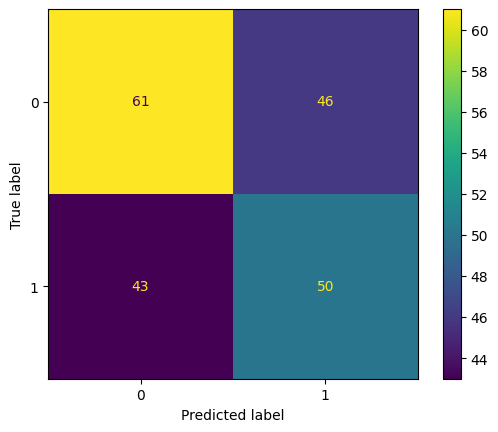

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)

In [64]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("precision score =",precision_score(Y_test,y_pred))
print("recall score =",recall_score(Y_test,y_pred))
print("f1score =",f1_score(Y_test,y_pred))

precision score = 0.5208333333333334
recall score = 0.5376344086021505
f1score = 0.5291005291005291


In [65]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,Y_train)

GaussianNB()

In [66]:
y_pred1=gb.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred1)*100)

53.0


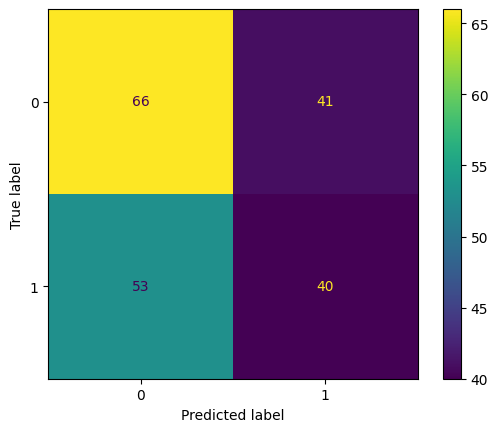

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred1)

In [69]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("precision score =",precision_score(Y_test,y_pred1)*100)
print("recall score =",recall_score(Y_test,y_pred1)*100)
print("f1score =",f1_score(Y_test,y_pred1)*100)

precision score = 49.382716049382715
recall score = 43.01075268817204
f1score = 45.97701149425287


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score

models=[DecisionTreeClassifier,KNeighborsClassifier,GaussianNB]

for model in models:
    md=model()
    md.fit(X_train,Y_train)
    y_pred=md.predict(X_test)
    print("=============",model,"============")
    print("accuracy_score",accuracy_score(Y_test,y_pred)*100)
    print("f1 score",f1_score(Y_test,y_pred)*100)

============= <class 'sklearn.tree._classes.DecisionTreeClassifier'> ============
accuracy_score 52.0
f1 score 51.02040816326531
============= <class 'sklearn.neighbors._classification.KNeighborsClassifier'> ============
accuracy_score 54.50000000000001
f1 score 50.810810810810814
============= <class 'sklearn.naive_bayes.GaussianNB'> ============
accuracy_score 53.0
f1 score 45.97701149425287
